In [45]:
#collecting data

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

tickers = ["TSLA", "MSFT", "AAPL", "AMZN", "GOOG", "NVDA", "^GSPC"]
ohlcv = {}
adj_close = {}
start_date = "2015-01-01"
end_date = "2025-01-01"

data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=True)

prices_df = data['Close']
prices_df.dropna(inplace=True)

print(prices_df.head())

log_returns_df = np.log(prices_df / prices_df.shift(1))
log_returns_df.dropna(inplace=True)
 
print(log_returns_df)

[*********************100%***********************]  7 of 7 completed

Ticker           AAPL     AMZN       GOOG       MSFT      NVDA       TSLA  \
Date                                                                        
2015-01-02  24.288588  15.4260  26.014023  39.998707  0.483066  14.620667   
2015-01-05  23.604334  15.1095  25.471745  39.630878  0.474906  14.006000   
2015-01-06  23.606558  14.7645  24.881382  39.049210  0.460508  14.085333   
2015-01-07  23.937567  14.9210  24.838755  39.545341  0.459308  14.063333   
2015-01-08  24.857304  15.0230  24.917074  40.708698  0.476586  14.041333   

Ticker            ^GSPC  
Date                     
2015-01-02  2058.199951  
2015-01-05  2020.579956  
2015-01-06  2002.609985  
2015-01-07  2025.900024  
2015-01-08  2062.139893  
Ticker          AAPL      AMZN      GOOG      MSFT      NVDA      TSLA  \
Date                                                                     
2015-01-05 -0.028576 -0.020731 -0.021066 -0.009239 -0.017035 -0.042950   
2015-01-06  0.000094 -0.023098 -0.023450 -0.014786 -0.03


/var/folders/5_/t6j4c_393llc2ffbkjsdr9mr0000gn/T/ipykernel_17476/954160355.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices_df.dropna(inplace=True)


In [ ]:
#excess market and tickers returns

risk_free_data = yf.download("^IRX", start=start_date, end=end_date, auto_adjust=True)
risk_free_rate_raw = risk_free_data["Close"]

if isinstance(risk_free_rate_raw, pd.Series):
    risk_free_data_daily = risk_free_rate_raw / 100 / 252
else:
    risk_free_data_daily = pd.Series(0.0001/252, index=log_returns_df.index)

common_dates = log_returns_df.index.intersection(risk_free_data_daily.index)
log_returns_df_synced = log_returns_df.loc[common_dates]
risk_free_data_daily_synced = risk_free_data_daily.loc[common_dates]

excess_returns_df = log_returns_df_synced.copy()
market_excess_returns = excess_returns_df['^GSPC'] - risk_free_data_daily_synced

for col in excess_returns_df.columns:
    if col != '^GSPC':
        excess_returns_df[col] = excess_returns_df[col] - risk_free_data_daily_synced



excess_returns_df.drop(columns=['^GSPC'], inplace=True)

print('Excess returns')
print(excess_returns_df.head())
print('Market excess returns')
print(market_excess_returns.head())

[*********************100%***********************]  1 of 1 completed

Excess returns
Ticker          AAPL      AMZN      GOOG      MSFT      NVDA      TSLA  \
Date                                                                     
2015-01-05 -0.028577 -0.020731 -0.021066 -0.009239 -0.017035 -0.042951   
2015-01-06  0.000094 -0.023098 -0.023450 -0.014786 -0.030787  0.005648   
2015-01-07  0.013924  0.010544 -0.001715  0.012625 -0.002609 -0.001564   
2015-01-08  0.037702  0.006812  0.003148  0.028993  0.036927 -0.001566   
2015-01-09  0.001072 -0.011819 -0.013036 -0.008441  0.004019 -0.018981   

Ticker              ^IRX  
Date                      
2015-01-05 -1.609438e+00  
2015-01-06  1.897120e+00  
2015-01-07 -3.968254e-07  
2015-01-08 -1.053609e-01  
2015-01-09 -1.823219e-01  
Market excess returns
Date
2015-01-05   -0.018448
2015-01-06   -0.008934
2015-01-07    0.011562
2015-01-08    0.017730
2015-01-09   -0.008440
dtype: float64


CARM model
                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     3194.
Date:                Fri, 11 Jul 2025   Prob (F-statistic):               0.00
Time:                        16:49:42   Log-Likelihood:                 7568.7
No. Observations:                2512   AIC:                        -1.513e+04
Df Residuals:                    2510   BIC:                        -1.512e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      1.8

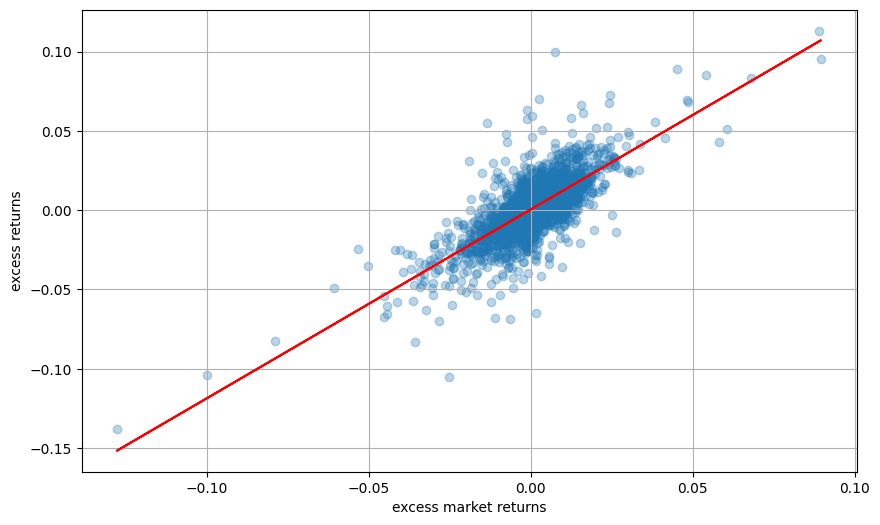

CARM model
                            OLS Regression Results                            
Dep. Variable:                   AMZN   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     1637.
Date:                Fri, 11 Jul 2025   Prob (F-statistic):          5.19e-276
Time:                        16:49:42   Log-Likelihood:                 6823.0
No. Observations:                2512   AIC:                        -1.364e+04
Df Residuals:                    2510   BIC:                        -1.363e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.000      1.7

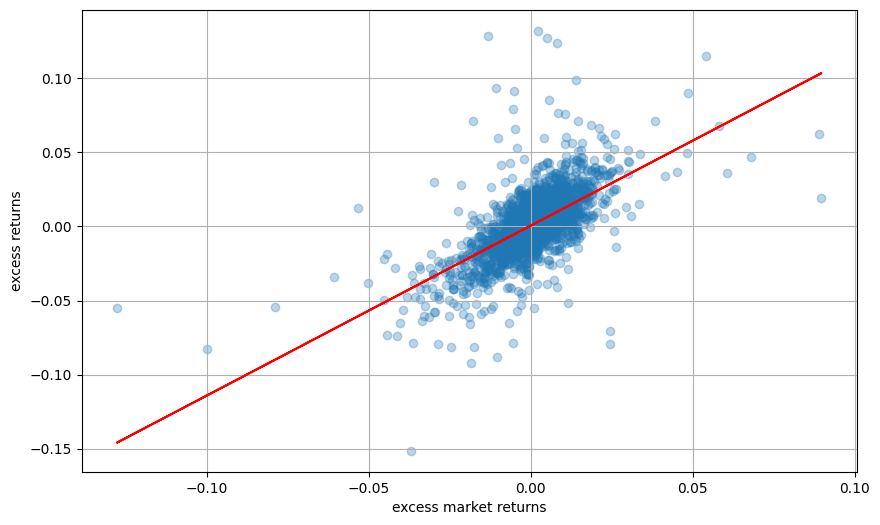

CARM model
                            OLS Regression Results                            
Dep. Variable:                   GOOG   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     2687.
Date:                Fri, 11 Jul 2025   Prob (F-statistic):               0.00
Time:                        16:49:42   Log-Likelihood:                 7452.9
No. Observations:                2512   AIC:                        -1.490e+04
Df Residuals:                    2510   BIC:                        -1.489e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      1.2

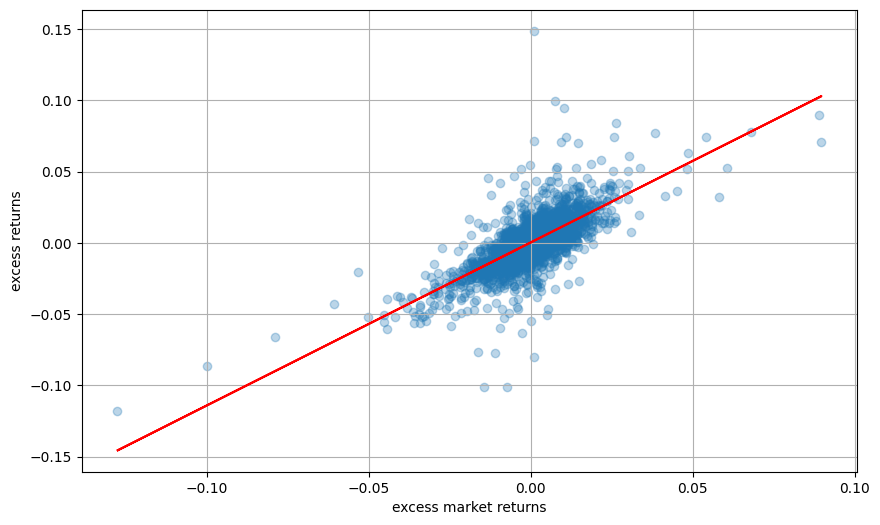

CARM model
                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     4433.
Date:                Fri, 11 Jul 2025   Prob (F-statistic):               0.00
Time:                        16:49:42   Log-Likelihood:                 7942.8
No. Observations:                2512   AIC:                        -1.588e+04
Df Residuals:                    2510   BIC:                        -1.587e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      2.0

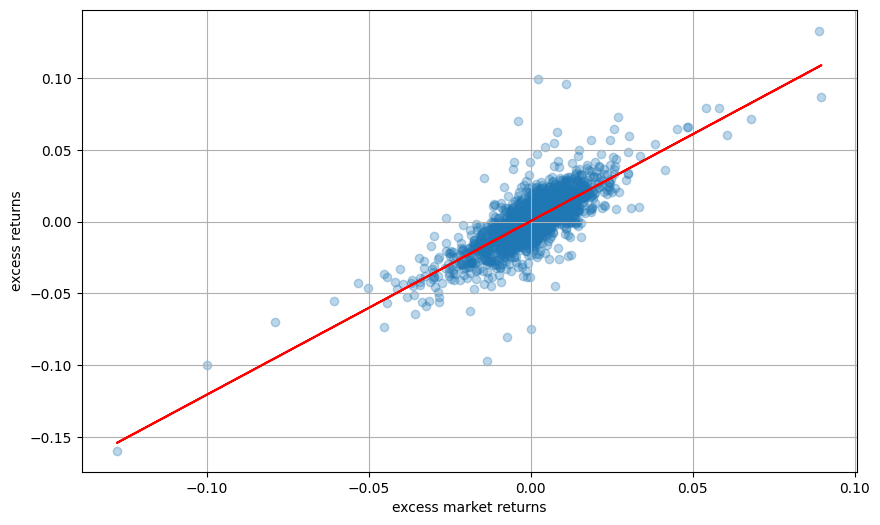

CARM model
                            OLS Regression Results                            
Dep. Variable:                   NVDA   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     1807.
Date:                Fri, 11 Jul 2025   Prob (F-statistic):          5.95e-298
Time:                        16:49:43   Log-Likelihood:                 5909.8
No. Observations:                2512   AIC:                        -1.182e+04
Df Residuals:                    2510   BIC:                        -1.180e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0015      0.000      3.2

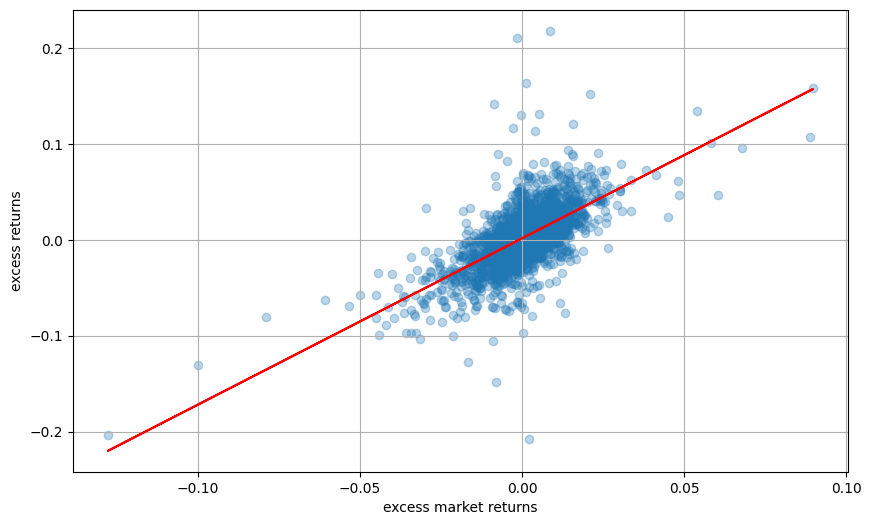

CARM model
                            OLS Regression Results                            
Dep. Variable:                   TSLA   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     731.2
Date:                Fri, 11 Jul 2025   Prob (F-statistic):          1.54e-141
Time:                        16:49:43   Log-Likelihood:                 5124.2
No. Observations:                2512   AIC:                        -1.024e+04
Df Residuals:                    2510   BIC:                        -1.023e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.001      1.0

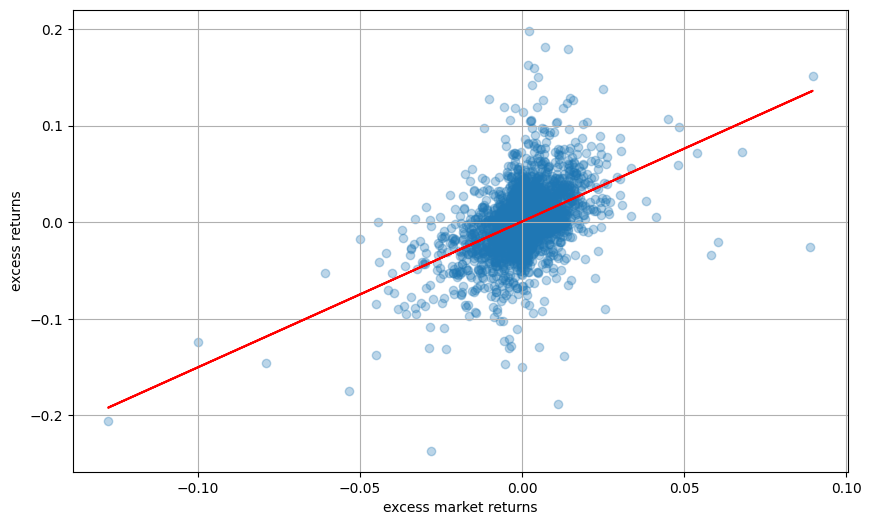

CARM model
                            OLS Regression Results                            
Dep. Variable:                   ^IRX   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.483
Date:                Fri, 11 Jul 2025   Prob (F-statistic):              0.115
Time:                        16:49:43   Log-Likelihood:                 6.6350
No. Observations:                2512   AIC:                            -9.270
Df Residuals:                    2510   BIC:                             2.388
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0017      0.005      0.3

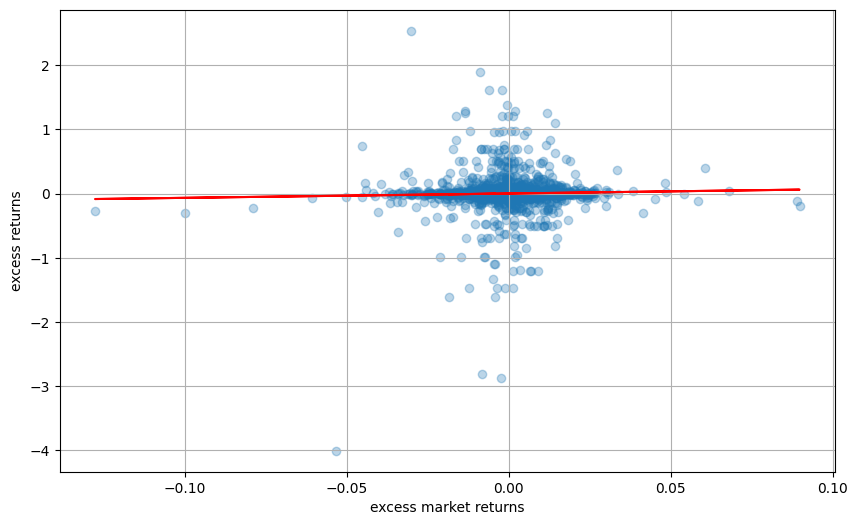

In [47]:
#CARM Model

for stock_ticker in excess_returns_df.columns:
    Y = excess_returns_df[stock_ticker]
    X = market_excess_returns

    X = sm.add_constant(X)

    model = sm.OLS(Y, X)
    results = model.fit()

    print('CARM model')
    print(results.summary())

    plt.figure(figsize=(10, 6))
    plt.scatter(X.iloc[:, 1], Y, alpha = 0.3, label='fact')
    plt.plot(X.iloc[:, 1], results.predict(X), color='red', label='lineal regression')
    plt.xlabel('excess market returns')
    plt.ylabel('excess returns')
    plt.legend
    plt.grid(True)
    plt.show()
    